## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
studyResults = "data/Study_results.csv"

# Read the mouse data and the study results
studyResults = pd.read_csv(studyResults)
studyResults.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Study data files
mouseMetadata = "data/Mouse_metadata.csv"

# Read the mouse data and the study results
mouseMetadata = pd.read_csv(mouseMetadata)
mouseMetadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:

# Combine the data into a single dataset
dataframe = pd.merge(mouseMetadata, studyResults,how='outer', on='Mouse ID')
dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
dataframe.describe()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [5]:
#Group combined data frame by drug regimen and timepoint
#Extract the mean of the tumor volume column
dataframeGroupMean = dataframe.groupby(["Drug Regimen", "Timepoint"])['Tumor Volume (mm3)'].mean()
dataframeGroupMean = dataframeGroupMean.reset_index()
dataframeGroupMean



,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [6]:
#Group combined data frame by drug regimen and timepoint
#Extract the variance of the tumor volume column
dataframeGroupVar = dataframe.groupby(["Drug Regimen", "Timepoint"])['Tumor Volume (mm3)'].var()
dataframeGroupVar = dataframeGroupVar.reset_index()
dataframeGroupVar

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,5.030889
2,Capomulin,10,12.344133
3,Capomulin,15,16.878693
4,Capomulin,20,19.035028
...,...,...,...
95,Zoniferol,25,5.808348
96,Zoniferol,30,9.601024
97,Zoniferol,35,10.876760
98,Zoniferol,40,13.958456


In [7]:
#Group combined data frame by drug regimen and timepoint
#Extract the SEM of the tumor volume column
dataframeGroupSEM = dataframe.groupby(["Drug Regimen", "Timepoint"])['Tumor Volume (mm3)'].sem()
dataframeGroupSEM = dataframeGroupSEM.reset_index()
dataframeGroupSEM

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [8]:
#Group combined data frame by drug regimen and timepoint
#Extract the standard deviation of the tumor volume column
dataframeGroupStDev = dataframe.groupby(["Drug Regimen", "Timepoint"])['Tumor Volume (mm3)'].std()
dataframeGroupStDev = dataframeGroupStDev.reset_index()
dataframeGroupStDev

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915
...,...,...,...
95,Zoniferol,25,2.410052
96,Zoniferol,30,3.098552
97,Zoniferol,35,3.297993
98,Zoniferol,40,3.736102


In [9]:
# reformat dataframes
dataframeGroupStDev = dataframeGroupStDev.pivot(index='Timepoint', columns='Drug Regimen',values='Tumor Volume (mm3)')
dataframeGroupStDev.head()

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,2.385335,1.270025,0.970606,1.068422,1.158540,2.414777,1.222123,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.114737,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.442074,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.984408,2.198367


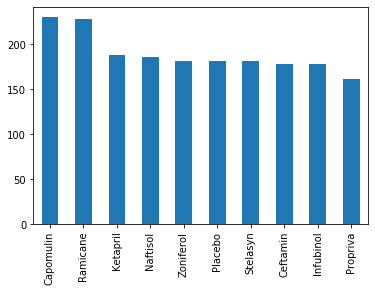

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#dataframe.plot(kind='bar', x="Drug Regimen", y="Timepoint")
dataframe["Drug Regimen"].value_counts().plot(kind='bar', y='# of Data Points')

Text(0, 0.5, '# of Data Points')

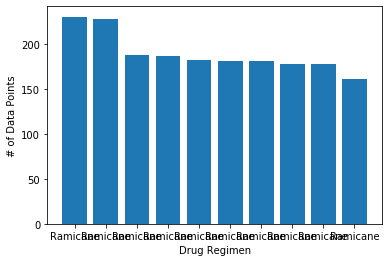

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugRegimens = dataframe['Drug Regimen']
yAxis = drugRegimens.value_counts()
plt.bar(np.arange(len(yAxis)), yAxis)
plt.xticks(np.arange(len(yAxis)), drugRegimens.tolist())
plt.xlabel('Drug Regimen')
plt.ylabel('# of Data Points')

## Pie plots

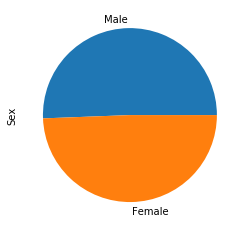

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dataframe["Sex"].value_counts().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1a2536d6d0>,
 [Text(-0.02099250347258543, 1.0997996703027118, ''),
  Text(0.020992503472585782, -1.0997996703027118, '')])

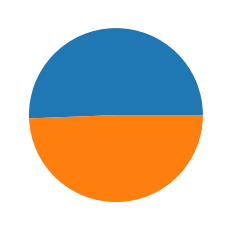

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = dataframe['Sex']
yAxis = sexes.value_counts()
plt.pie(yAxis)


## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen